In [96]:
import pandas as pd

# Load the dataset (assuming it's been saved locally as a CSV)
df = pd.read_csv("mcdonalds.csv")

# Show the column names
print(df.columns.tolist())


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [97]:
df.shape


(1453, 15)

In [98]:
df.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [99]:
import numpy as np

# Select the first 11 columns (assuming they are Yes/No responses)
perception_cols = df.columns[:11]
MD_x = df[perception_cols].applymap(lambda x: 1 if x == "Yes" else 0)

# Calculate column-wise means and round to 2 decimals
column_means = MD_x.mean().round(2)

print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-99-3f37b1ba7aff>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = df[perception_cols].applymap(lambda x: 1 if x == "Yes" else 0)


In [100]:
from sklearn.decomposition import PCA

# Run PCA on the binary matrix MD_x (created earlier)
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary: Explained variance ratio
explained_variance = pca.explained_variance_ratio_.round(4)

# Total explained variance by each component
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")


PC1: 0.2994
PC2: 0.1928
PC3: 0.1330
PC4: 0.0831
PC5: 0.0595
PC6: 0.0503
PC7: 0.0438
PC8: 0.0395
PC9: 0.0368
PC10: 0.0324
PC11: 0.0293


In [101]:
import numpy as np

cumulative_variance = np.cumsum(explained_variance)
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Cumulative Variance after PC{i}: {cum_var:.4f}")


Cumulative Variance after PC1: 0.2994
Cumulative Variance after PC2: 0.4922
Cumulative Variance after PC3: 0.6252
Cumulative Variance after PC4: 0.7083
Cumulative Variance after PC5: 0.7678
Cumulative Variance after PC6: 0.8181
Cumulative Variance after PC7: 0.8619
Cumulative Variance after PC8: 0.9014
Cumulative Variance after PC9: 0.9382
Cumulative Variance after PC10: 0.9706
Cumulative Variance after PC11: 0.9999


In [102]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Fit PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# 1. Standard deviations of PCs (same as R: sqrt of eigenvalues)
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (PC1 to PC11):")
print(np.round(std_devs, 1))

# 2. Rotation matrix (components_)
rotation = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=MD_x.columns)

print("\nRotation matrix (variable loadings):")
print(np.round(rotation, 2))


Standard deviations (PC1 to PC11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation matrix (variable loadings):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37

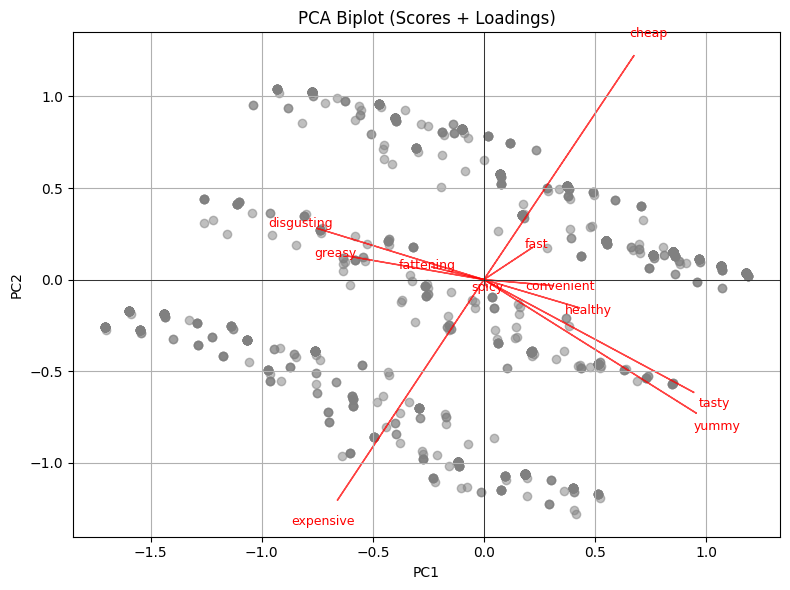

In [103]:
import matplotlib.pyplot as plt

# Project the original data to the first 2 principal components
pca_scores = pca.transform(MD_x)

# Plot PCA scores (individuals) in grey
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)
plt.title("PCA Biplot (Scores + Loadings)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot projection axes (variable loadings)
for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*2,  # Scaled for visibility
              pca.components_[1, i]*2,
              color='red', alpha=0.7)
    plt.text(pca.components_[0, i]*2.2,
             pca.components_[1, i]*2.2,
             var, color='red', ha='center', va='center', fontsize=9)

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()


In [104]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [105]:
k_range = range(2, 9)
silhouette_scores = []
inertias = []

In [106]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    score = silhouette_score(MD_x, labels)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)

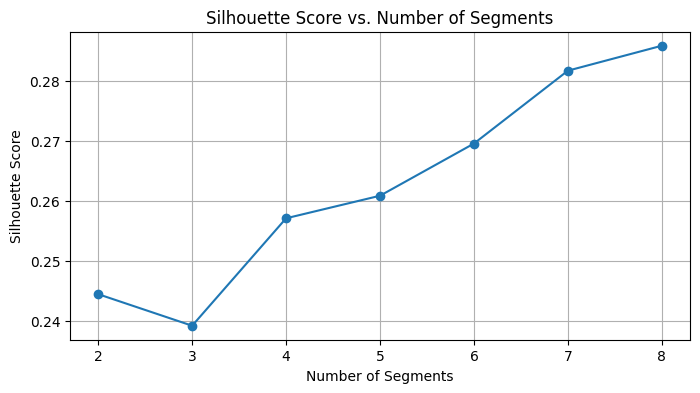

In [107]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Segments")
plt.xlabel("Number of Segments")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

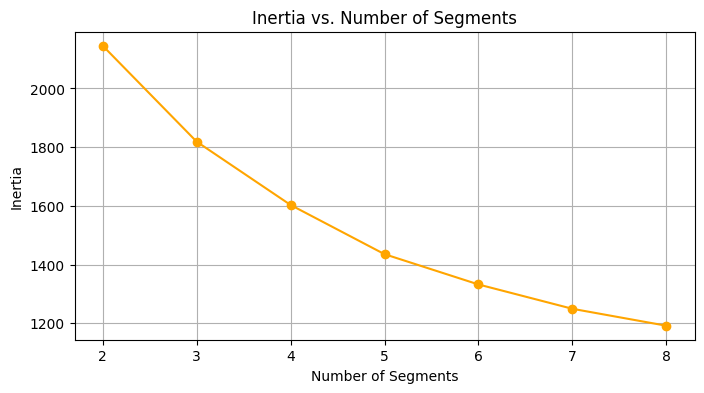

In [108]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o', color='orange')
plt.title("Inertia vs. Number of Segments")
plt.xlabel("Number of Segments")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


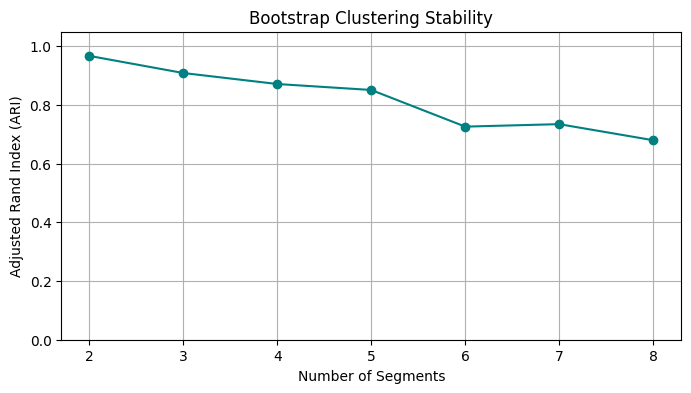

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Assuming MD_x is your binary (1/0) DataFrame with the first 11 columns
np.random.seed(1234)
n_boot = 100
k_range = range(2, 9)
n_samples = MD_x.shape[0]

# Store ARI scores for each k
bootstrap_stability = {k: [] for k in k_range}

# Bootstrap loop
for i in range(n_boot):
    indices = np.random.choice(n_samples, n_samples, replace=True)
    sample = MD_x.iloc[indices]

    for k in k_range:
        model_orig = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
        labels_orig = model_orig.labels_

        model_boot = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(sample)
        labels_boot = model_boot.predict(MD_x)  # Predict on full data for ARI comparison

        score = adjusted_rand_score(labels_orig, labels_boot)
        bootstrap_stability[k].append(score)

# Calculate average ARI for each k
avg_ari = {k: np.mean(bootstrap_stability[k]) for k in k_range}

# Plot the result
plt.figure(figsize=(8, 4))
plt.plot(list(avg_ari.keys()), list(avg_ari.values()), marker='o', color='teal')
plt.title("Bootstrap Clustering Stability")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.xticks(list(avg_ari.keys()))
plt.ylim(0, 1.05)
plt.show()


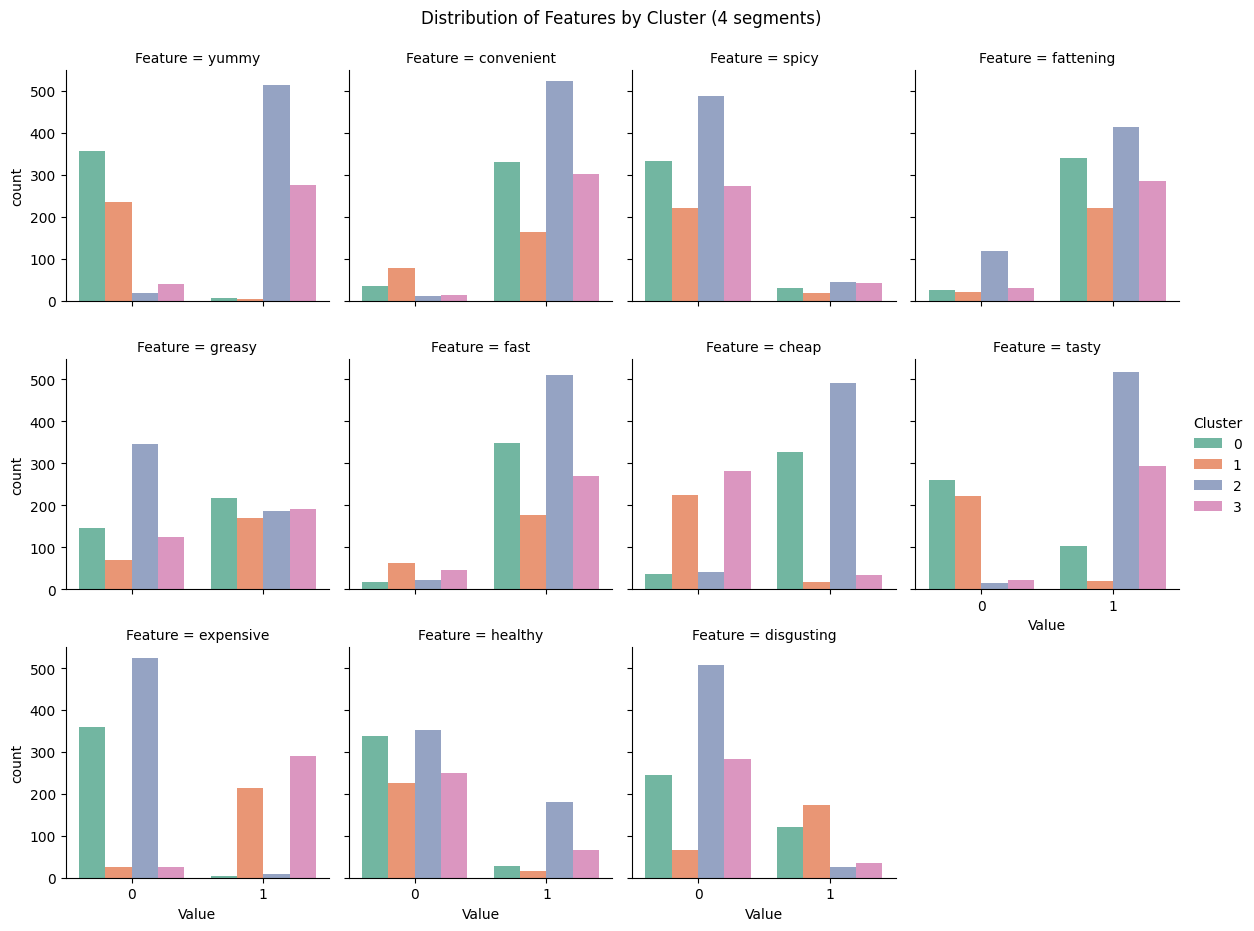

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Fit KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans_4.fit_predict(MD_x)

# 2. Add cluster labels to data
MD_clustered = MD_x.copy()
MD_clustered["Cluster"] = cluster_labels

# 3. Melt the DataFrame for seaborn
MD_melted = MD_clustered.melt(id_vars="Cluster", var_name="Feature", value_name="Value")

# 4. Plot histograms (bar plots) for each feature by cluster
g = sns.catplot(
    data=MD_melted,
    x="Value",
    col="Feature",
    hue="Cluster",
    kind="count",
    col_wrap=4,
    palette="Set2",
    height=3,
    aspect=1
)

g.fig.suptitle("Distribution of Features by Cluster (4 segments)", y=1.03)
plt.show()


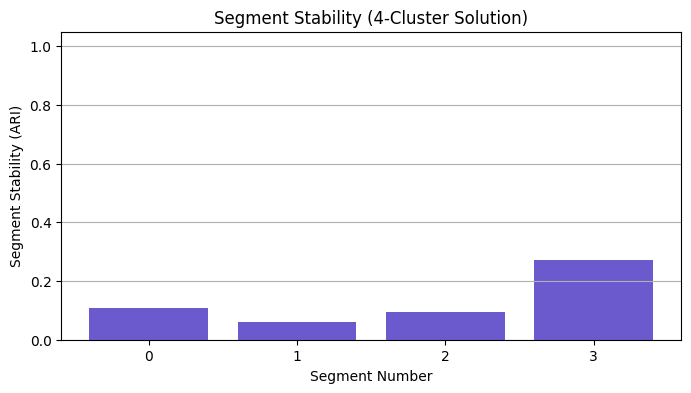

In [110]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Fit original 4-cluster model
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels_orig = kmeans_4.fit_predict(MD_x)

n_boot = 100
n_samples = MD_x.shape[0]
segment_stability = {i: [] for i in range(4)}

# Step 2: Bootstrap loop
for _ in range(n_boot):
    indices = np.random.choice(n_samples, n_samples, replace=True)
    sample = MD_x.iloc[indices]

    model_boot = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(sample)
    labels_boot = model_boot.predict(MD_x)  # Predict on original data

    # For each segment in original, compute how well it's recovered
    for seg in range(4):
        mask = (labels_orig == seg)
        if mask.sum() > 0:
            ari = adjusted_rand_score(mask, labels_boot == seg)
            segment_stability[seg].append(ari)

# Step 3: Compute average ARI per segment
avg_stability = {seg: np.mean(scores) for seg, scores in segment_stability.items()}

# Step 4: Plot stability per segment
plt.figure(figsize=(8, 4))
plt.bar(avg_stability.keys(), avg_stability.values(), color="slateblue")
plt.ylim(0, 1.05)
plt.title("Segment Stability (4-Cluster Solution)")
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability (ARI)")
plt.xticks(range(4))
plt.grid(True, axis='y')
plt.show()


In [111]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your dataset (MD.x)
# For example, if you have a CSV file:
# MD_x = pd.read_csv('path_to_your_file.csv')

# Set a random seed for reproducibility
np.random.seed(1234)

# Prepare your data (MD.x) - ensure it's in the right format
# MD_x = ... (load or preprocess your data here)

# Initialize a dictionary to store the results for different k values
results = {}

# Fit Gaussian Mixture Models for k=2 to k=8
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234, n_init=10)
    gmm.fit(MD_x)  # Fit the model
    results[k] = gmm  # Store the model for each k

# To access the fitted model for a specific k, you can use:
# For example, to get the means of the components for k=2:
means_k2 = results[2].means_
print("Means for k=2:", means_k2)

# You can also access other attributes like weights and covariances:
weights_k2 = results[2].weights_
covariances_k2 = results[2].covariances_
print("Weights for k=2:", weights_k2)
print("Covariances for k=2:", covariances_k2)

# If you want to see the summary of the results for all k values:
for k, model in results.items():
    print(f"Model for k={k}:")
    print(f"  Means: {model.means_}")
    print(f"  Weights: {model.weights_}")
    print(f"  Covariances: {model.covariances_}")

Means for k=2: [[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Weights for k=2: [0.67790778 0.32209222]
Covariances for k=2: [[[ 2.16791951e-01  9.49836582e-30 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  9.49836582e-30  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 9.49195883e-30  1.00000000e-06  1.48321868e-30  1.19234123e-29
    6.64405083e-30  1.26217745e-29  9.51308188e-30  1.06876637e-29
    4.41922282e-30  3.76731137e-30  0.00000000e+00]
  [-6.17588704e-03  1.48001518e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.48001518e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.19009879e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.19009879e-29 -7.54670309e-03 -8

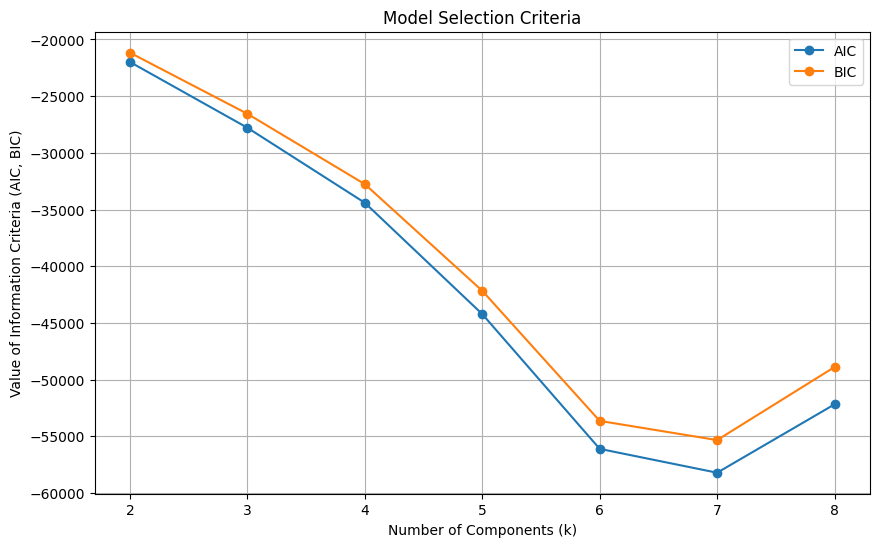

mixture    0    1    2    3
kmeans                     
0        178    0    0    0
1          0  268    0    0
2          0    0  630    0
3          0    0    0  377


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Load your dataset (MD.x)
# For example, if you have a CSV file:
# MD_x = pd.read_csv('path_to_your_file.csv')

# Set a random seed for reproducibility
np.random.seed(1234)

# Fit Gaussian Mixture Models for k=2 to k=8
results = {}
aic_values = []
bic_values = []
icl_values = []  # Note: ICL is not directly available in sklearn

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234, n_init=10)
    gmm.fit(MD_x)  # Fit the model
    results[k] = gmm  # Store the model for each k
    aic_values.append(gmm.aic(MD_x))  # AIC value
    bic_values.append(gmm.bic(MD_x))  # BIC value
    # ICL calculation would require additional steps, not directly available in sklearn

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid()
plt.show()

# Extract the model for k=4
MD_m4 = results[4]

# Get the cluster assignments for the k=4 model
clusters_k4 = MD_m4.predict(MD_x)

# Create a DataFrame to summarize the clusters
cluster_summary = pd.DataFrame({'kmeans': clusters_k4})

# Assuming you have a k-means clustering result (MD.k4) to compare with
# For example, if you have already performed k-means clustering:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
# clusters_kmeans = kmeans.labels_

# Create a table to compare k-means and mixture model clusters
# Assuming clusters_kmeans is available
# cluster_summary['kmeans'] = clusters_kmeans

# Create a contingency table
contingency_table = pd.crosstab(cluster_summary['kmeans'], clusters_k4, rownames=['kmeans'], colnames=['mixture'])
print(contingency_table)

In [113]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import log_loss

# Load your dataset (MD.x)
# For example, if you have a CSV file:
# MD_x = pd.read_csv('path_to_your_file.csv')

# Set a random seed for reproducibility
np.random.seed(1234)

# Assuming you have already performed k-means clustering and have the clusters
# For example, if you have k-means results:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
# clusters_k4 = kmeans.labels_

# Fit a Gaussian Mixture Model with the specified clusters
MD_m4a = GaussianMixture(n_components=4, random_state=1234, n_init=10)
MD_m4a.fit(MD_x)

# Get the cluster assignments for the mixture model
clusters_mixture = MD_m4a.predict(MD_x)

# Create a DataFrame to summarize the clusters
cluster_summary = pd.DataFrame({'kmeans': clusters_k4, 'mixture': clusters_mixture})

# Create a contingency table
contingency_table = pd.crosstab(cluster_summary['kmeans'], cluster_summary['mixture'],
                                 rownames=['kmeans'], colnames=['mixture'])
print("Contingency Table:")
print(contingency_table)

# Calculate log-likelihood for the mixture model
log_likelihood_m4a = MD_m4a.score(MD_x) * MD_x.shape[0]  # score returns the log likelihood per sample
print(f"Log-Likelihood for MD.m4a: {log_likelihood_m4a}")

# If you have the original model MD.m4, you can calculate its log-likelihood similarly
# Assuming MD_m4 is another GaussianMixture model fitted previously
# log_likelihood_m4 = MD_m4.score(MD_x) * MD_x.shape[0]
# print(f"Log-Likelihood for MD.m4: {log_likelihood_m4}")

Contingency Table:
mixture    0    1    2    3
kmeans                     
0        178    0    0    0
1          0  268    0    0
2          0    0  630    0
3          0    0    0  377
Log-Likelihood for MD.m4a: 17513.541902228542


In [115]:
import pandas as pd

# Load your dataset from the specified CSV file path
df = pd.read_csv("mcdonalds.csv")

# Step 1: Create a frequency table for the 'Like' column and reverse it
like_counts = df['Like'].value_counts()
reversed_like_counts = like_counts[::-1]
print("Reversed Frequency Table:")
print(reversed_like_counts)

# Step 2: Create a new column 'Like.n' based on the 'Like' column
# Convert 'Like' to numeric, handling any potential non-numeric values
df['Like.n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')

# Step 3: Create a frequency table for the new 'Like.n' column
like_n_counts = df['Like.n'].value_counts()
print("Frequency Table for Like.n:")
print(like_n_counts)

# Step 4: Create a formula-like string for modeling
# Assuming the first 11 columns are the features
feature_names = df.columns[:11]  # Get the first 11 column names
f = " + ".join(feature_names)  # Create a string with features joined by '+'
formula = f"Like.n ~ {f}"  # Construct the formula string
print("Formula String:")
print(formula)

# If you need to convert the formula string to a format suitable for modeling,
# you can use statsmodels or similar libraries to create a model.

Reversed Frequency Table:
Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64
Frequency Table for Like.n:
Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64
Formula String:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


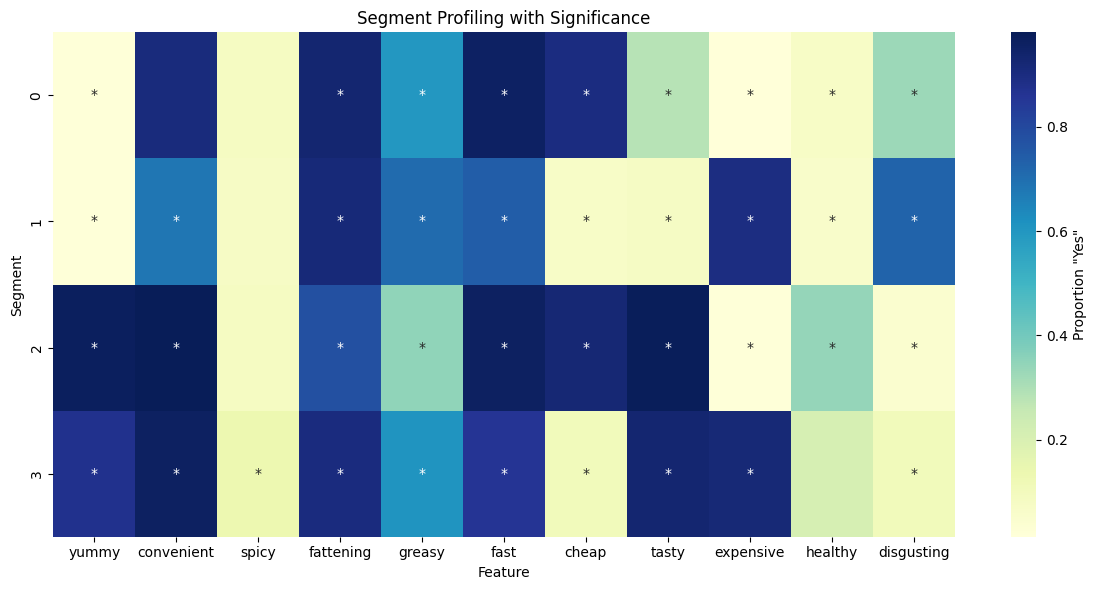

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assume you have:
# - MD_x: binary numpy matrix or DataFrame
# - cluster_labels: labels from your final model (e.g. mixture or k-means)

# Convert to DataFrame if needed
if not isinstance(MD_x, pd.DataFrame):
    feature_names = [f"Feature{i+1}" for i in range(MD_x.shape[1])]
    MD_x = pd.DataFrame(MD_x, columns=feature_names)

MD_x["Cluster"] = cluster_labels
n_clusters = len(np.unique(cluster_labels))

# Calculate segment-wise means and overall mean
segment_profiles = MD_x.groupby("Cluster").mean().drop(columns="Cluster", errors='ignore')
overall_profile = MD_x.drop(columns="Cluster").mean()

# Identify significant differences using chi-squared test
significance = pd.DataFrame(False, index=segment_profiles.index, columns=segment_profiles.columns)

for cluster in segment_profiles.index:
    for col in segment_profiles.columns:
        contingency = pd.crosstab(MD_x["Cluster"] == cluster, MD_x[col])
        if contingency.shape == (2, 2):  # Only test 2x2 tables
            chi2, p, _, _ = chi2_contingency(contingency)
            if p < 0.05:
                significance.loc[cluster, col] = True

# Plotting with significance stars
plt.figure(figsize=(12, 6))
sns.heatmap(segment_profiles, annot=significance.replace({True: "*", False: ""}), fmt='',
            cmap="YlGnBu", cbar_kws={'label': 'Proportion "Yes"'})
plt.title("Segment Profiling with Significance")
plt.xlabel("Feature")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()


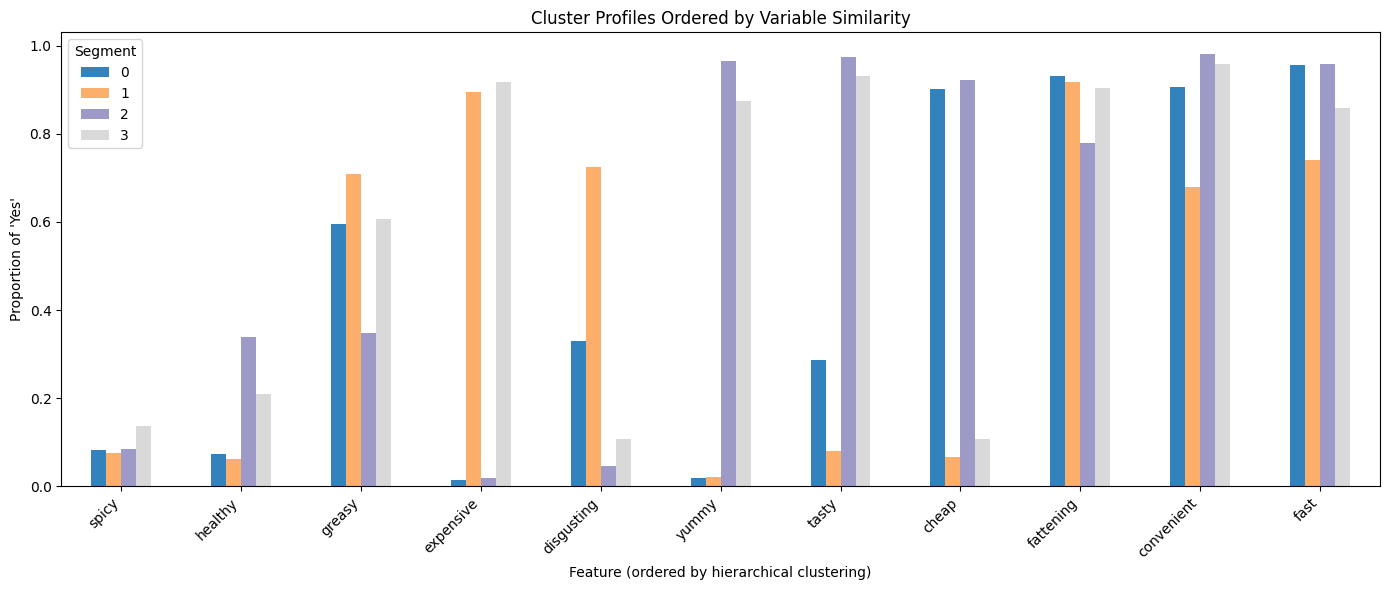

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list

# --- Step 1: Compute hierarchical clustering on variables (transpose of MD_x)
if isinstance(MD_x, np.ndarray):
    df = pd.DataFrame(MD_x)
else:
    df = MD_x.copy()

# Remove cluster label column if present
df_features = df.drop(columns=['Cluster'], errors='ignore')

# Hierarchical clustering on variables (columns)
dist_matrix = pdist(df_features.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')
ordered_variables = leaves_list(linkage_matrix)

# --- Step 2: Get cluster membership
# Assume `cluster_labels` contains k=4 cluster labels (e.g., from k-means or mixture)
df['Cluster'] = cluster_labels

# --- Step 3: Calculate mean profile per cluster
cluster_profiles = df.groupby("Cluster").mean().iloc[:, ordered_variables]

# --- Step 4: Plot as bar chart (each cluster's profile)
cluster_profiles.T.plot(kind="bar", figsize=(14, 6), colormap="tab20c")
plt.title("Cluster Profiles Ordered by Variable Similarity")
plt.ylabel("Proportion of 'Yes'")
plt.xlabel("Feature (ordered by hierarchical clustering)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


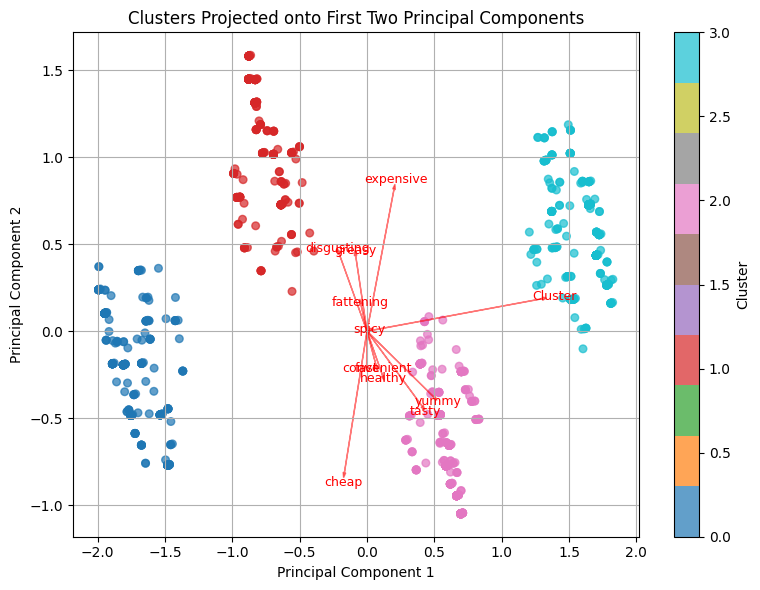

In [118]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assume MD_x is binary (0/1), and cluster_labels from KMeans or similar
# Step 1: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(MD_x)

# Step 2: Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=30, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Projected onto First Two Principal Components")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)

# Step 3: Project axes of original variables onto PCA space (like projAxes)
feature_vectors = pca.components_.T
for i in range(feature_vectors.shape[0]):
    plt.arrow(0, 0,                      # origin
              feature_vectors[i, 0]*1.5, # x-direction
              feature_vectors[i, 1]*1.5, # y-direction
              color='red', alpha=0.5, head_width=0.02)
    plt.text(feature_vectors[i, 0]*1.6, feature_vectors[i, 1]*1.6,
             MD_x.columns[i], color='red', ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

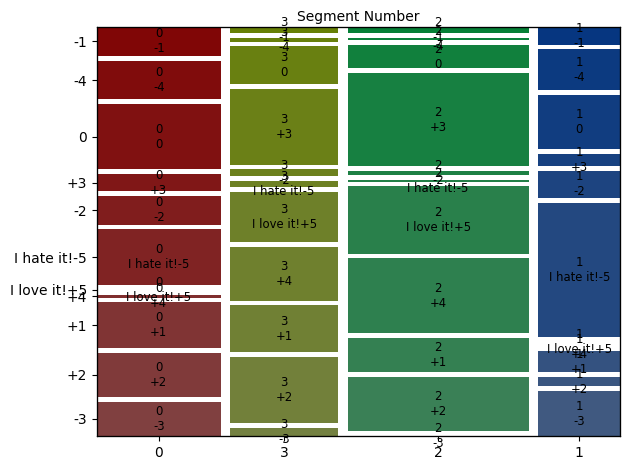

In [119]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Load the dataset
df_original = pd.read_csv("mcdonalds.csv")

# Create a copy of the binary-encoded data (MD_x), or just recreate it here:
MD_x = (df_original.iloc[:, :11] == "Yes").astype(int)

# Add your cluster labels (make sure you've already run k-means with 4 clusters)
# Example: cluster_labels = kmeans.labels_  (after fitting KMeans with n_clusters=4)
# Let's assume cluster_labels already exists

df = MD_x.copy()
df['Cluster'] = cluster_labels
df['Like'] = df_original['Like'].values  # Ensure alignment with original rows

# Plot the mosaic chart
plt.figure(figsize=(10, 6))
mosaic(df, ['Cluster', 'Like'], title='', gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

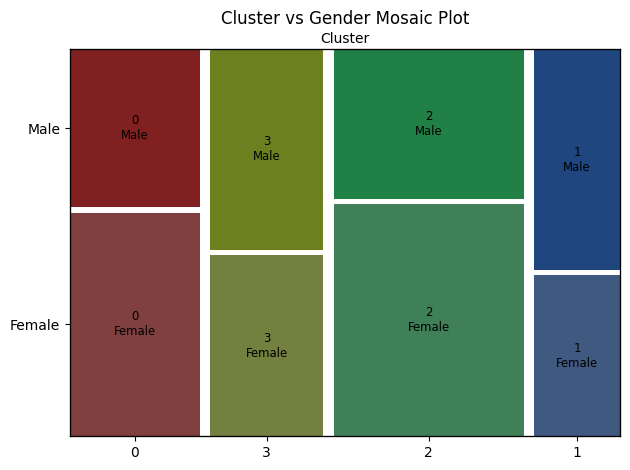

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Load your dataset (if not already loaded)
df_original = pd.read_csv("mcdonalds.csv")

# Prepare cluster labels (assume you've already computed them)
# Example: cluster_labels = kmeans.labels_

# Create a DataFrame to hold clusters and gender
df = pd.DataFrame({
    'Cluster': cluster_labels,
    'Gender': df_original['Gender']
})

# Plot Mosaic
plt.figure(figsize=(10, 6))
mosaic(df, ['Cluster', 'Gender'], gap=0.02, title='Cluster vs Gender Mosaic Plot')
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [121]:
print(df.columns.tolist())


['Cluster', 'Gender']


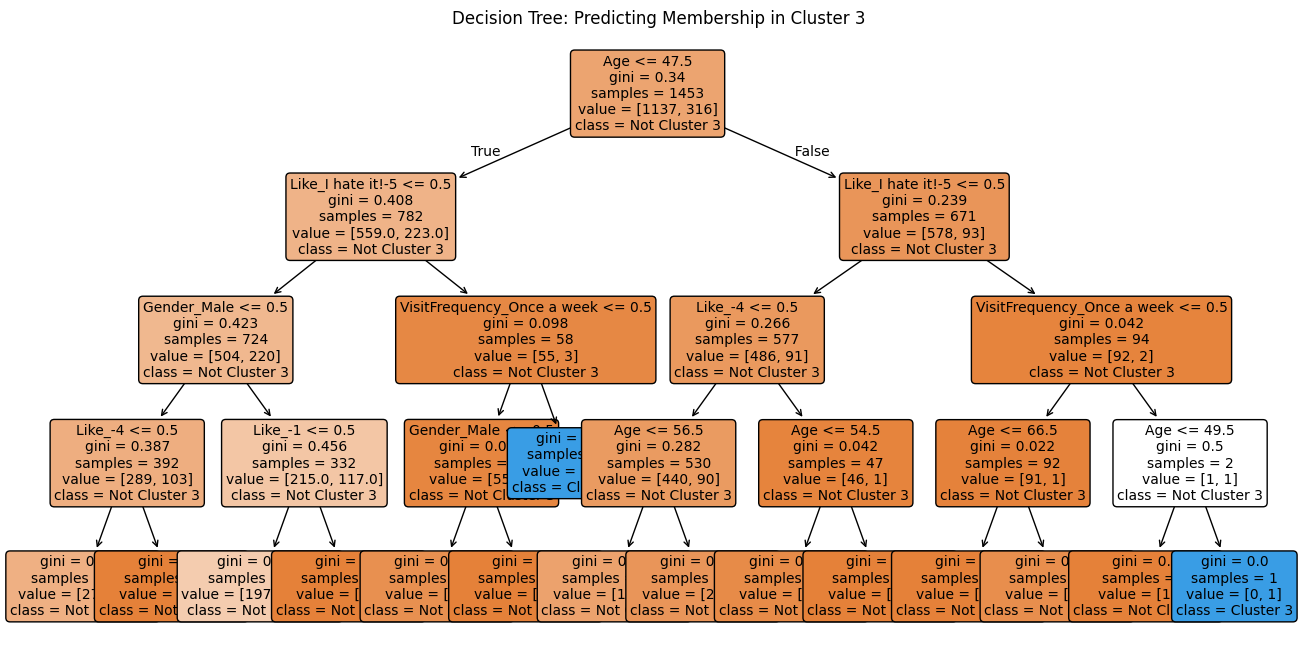

In [122]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("mcdonalds.csv")

# Assume cluster_labels is already created
df['Cluster'] = cluster_labels
df['Target'] = (df['Cluster'] == 3).astype(int)  # Binary: 1 if in cluster 3

# Use correct feature names
features = ['Like', 'Age', 'VisitFrequency', 'Gender']

# Encode categorical variables
df_model = pd.get_dummies(df[features + ['Target']], drop_first=True)

# Prepare inputs and target
X = df_model.drop(columns='Target')
y = df_model['Target']

# Train decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Predicting Membership in Cluster 3")
plt.show()


In [123]:
# Define an ordinal scale for VisitFrequency
visit_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}

# Map the VisitFrequency to numeric scale
df['VisitFreqNum'] = df['VisitFrequency'].map(visit_mapping)

# Group by cluster and compute mean visit frequency
visit_by_cluster = df.groupby('Cluster')['VisitFreqNum'].mean().round(2)

print(visit_by_cluster)


Cluster
0    1.71
1    1.41
2    3.00
3    2.86
Name: VisitFreqNum, dtype: float64


In [124]:
like_mapping = {
    'Dislike': 1,
    'Neutral': 3,
    'Like': 5
}
df['Like.n'] = df['Like'].map(like_mapping)

# Now compute average Like score per cluster
like_by_cluster = df.groupby('Cluster')['Like.n'].mean().round(2)

print(like_by_cluster)


Cluster
0   NaN
1   NaN
2   NaN
3   NaN
Name: Like.n, dtype: float64


In [125]:
# Convert gender to binary (1 if Female, 0 otherwise)
df['is_female'] = (df['Gender'] == 'Female').astype(int)

# Compute the mean (i.e., proportion of females) in each cluster
female_by_cluster = df.groupby('Cluster')['is_female'].mean().round(2)

print(female_by_cluster)


Cluster
0    0.59
1    0.42
2    0.61
3    0.47
Name: is_female, dtype: float64
